In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
%matplotlib inline

In [2]:
data1=scipy.io.loadmat('data/ex7data1.mat')
X=data1['X']

# K-means Clustering

In [3]:
def plot_data(X, labels=None, centroids=[]):
    """"

    """
    plt.scatter(X[:,0],X[:,1], c=labels, edgecolors='k')

    tmpx,tmpy = [], []
    for i in xrange(len(centroids)):
        tmpx.append(centroids[i][:,0])
        tmpy.append(centroids[i][:,1])
        
    plt.plot(tmpx, tmpy, 'rx--', markersize=8)

    plt.legend()
    plt.grid(True)
    
def init_centroids(X, k=2):
    """
    Random initialization of the cluster centroids
    """
    idx = np.random.permutation(len(X))
    return X[ idx[:k,] ]

def find_closest_centroid(X, C):
    """
    Find the closest centroid to a given sample
    """
    idx = np.zeros(len(X))
        
    for i in xrange(len(X)):
        
        dist = np.zeros(len(C));
        
        for j in xrange(len(C)): 
            
            dist[j] = np.dot( (X[i] - C[j]).T, X[i] - C[j] )
        
        idx[i] = np.argmin(dist)
        
    return idx
        
def compute_centroid_means(X, labels):
    """
    Compute the centroid means
    """
    clusters = np.unique(labels)
    
    centroid = np.zeros( (clusters.shape[0], X.shape[1])) 
    
    for i in xrange(len(clusters)):
        
        centroid[i] = np.array(np.mean(X[ labels == clusters[i] ], axis=0))
    
    return centroid

def run_k_means(X, k = 2, max_iter = 10):
    """
    Full k-means algorithm
    """
    centroids = init_centroids(X,k)
    
    centroids_hist = []
    
    centroids_hist.append(centroids)
    
    for i in xrange(max_iter):
       
        idx = find_closest_centroid(X, centroids)
        centroids = compute_centroid_means(X, idx)
    
        centroids_hist.append(centroids)
    
    return idx,centroids, centroids_hist 

In [4]:
centroids = init_centroids(X,3)
idx = find_closest_centroid(X, centroids)
new_centroids = compute_centroid_means(X, idx)

Text(0.5,1,u'Last iteration')

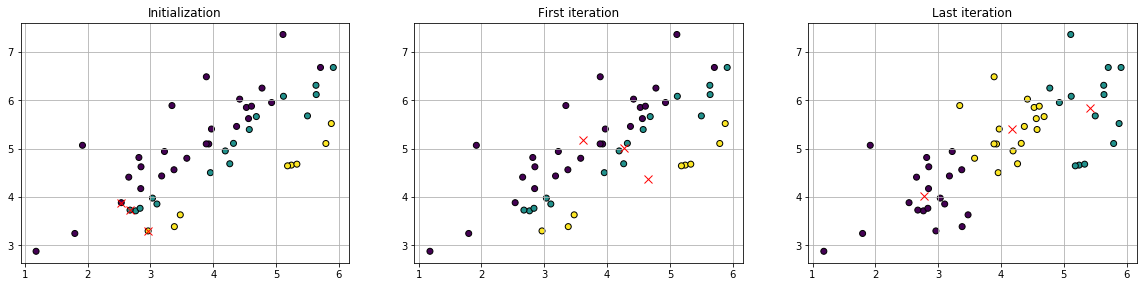

In [5]:
plt.figure(figsize=(20,15))
plt.subplot(331)
plot_data(X,idx, [centroids])
plt.title("Initialization")
plt.subplot(332)
plot_data(X,idx, [new_centroids])
plt.title("First iteration")
plt.subplot(333)
idx,centroids,centroids_hist = run_k_means(X, k = 3, max_iter = 200)
plot_data(X,idx, [centroids])
plt.title("Last iteration")

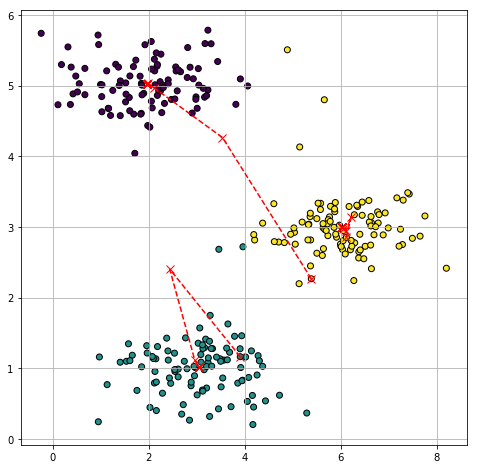

In [6]:
data2=scipy.io.loadmat('data/ex7data2.mat')
X=data2['X']
idx,centroids,centroids_hist = run_k_means(X, k = 3, max_iter = 200)
plt.figure(figsize=(8,8))
plot_data(X,idx, centroids_hist)

# Image compression with K-means

Image shape: (128, 128, 3)


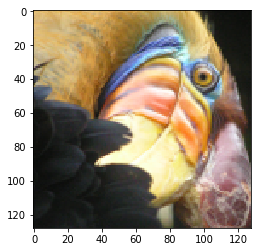

In [7]:
import matplotlib.image as mpimg
img=mpimg.imread('data/bird_small.png')
plt.imshow(img)
print "Image shape:", img.shape

In [8]:
img_color=img.reshape(-1, img.shape[2])
#print img_color.shape
#plt.imshow(img_color.reshape(128,128,3))

In [9]:
idx,centroids,centroids_hist = run_k_means(img_color, k = 16, max_iter = 10)

In [10]:
idx = find_closest_centroid(img_color, centroids)

In [11]:
img_compress = np.zeros( img_color.shape )
for i in xrange(len(idx)):
    img_compress[i] = centroids[ int(idx[i]) ]

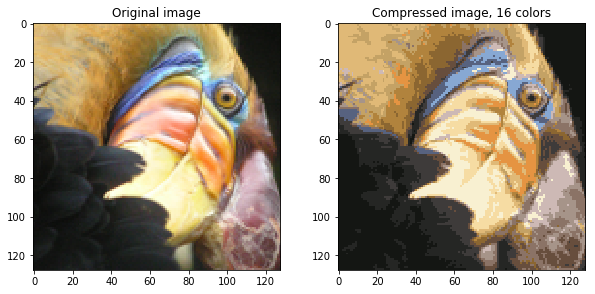

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_color.reshape(128,128,3))
plt.title('Original image')
plt.subplot(222)
plt.title('Compressed image, 16 colors')
plt.imshow(img_compress.reshape(128,128,3))

# Principal Component Analysis

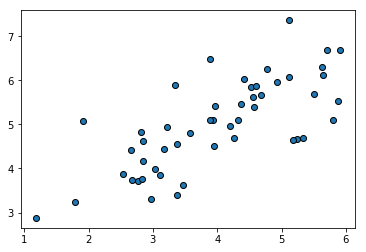

In [13]:
data1=scipy.io.loadmat('data/ex7data1.mat')
X=data1['X']
plt.plot(X[:,0],X[:,1], 'o', mec='k')

### Implementing PCA

In [14]:
def feature_normalization(X):
    """
    Normalize features
    """
    means, stds = np.mean(X,axis=0), np.std(X,axis=0)
    X_norm = (X - means) / stds
    return means, stds, X_norm

(-2.5, 2.5)

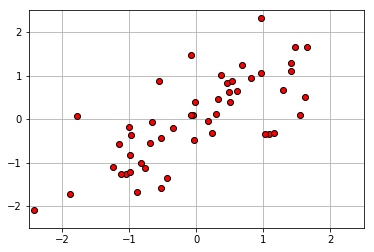

In [15]:
means, stds, X_norm = feature_normalization(X)
plt.plot(X_norm[:,0],X_norm[:,1], 'or', mec='k')
plt.grid(True)
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))

In [16]:
def compute_pca(X):
    """
    Compute the eigenvectors of the X covariance matrix
    """
    sigma = X.T.dot(X) / float(X.shape[1])
    U,S,V = sp.linalg.svd(X,full_matrices = True, compute_uv = True)
    return U,S,V

In [17]:
U,S,V = compute_pca(X_norm)

Top principal component is  [ 0.70710678  0.70710678]


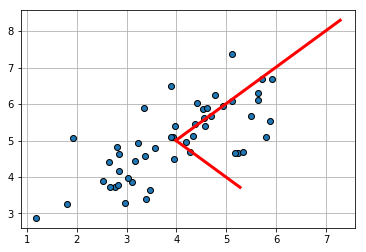

In [18]:
print 'Top principal component is ',V[:,0]
plt.plot(X[:,0],X[:,1], 'o', mec='k')

plt.plot([means[0], means[0] + 0.5*S[0]*V[0,0]], 
         [means[1], means[1] + 0.5*S[0]*V[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')

plt.plot([means[0], means[0] + 0.5*S[1]*V[1,0]], 
         [means[1], means[1] + 0.5*S[1]*V[1,1]],
        color='red',linewidth=3,
        label='Second Principal Component')

plt.grid(True)

### Dimensionality Reduction with PCA

In [23]:
def project_data(X,U,k=1):
    """
    Project the data onto the top 'K' eigenvectors
    """
    return X.dot(U[:k,:,].T)

def recover_data(Z,U,k=1):
    """
    Recover the projected data
    """
    return Z.dot(U[:k,:,])

In [24]:
print 'Value first example:',  X_norm[0]
z = project_data(X_norm,V,1)
print 'Projection of the first example is %0.3f.'%float(z[0])
X_rec = recover_data(z,V,1)
print 'Value first recovered example:', X_rec[0]

Value first example: [-0.52331306 -1.59279252]
Projection of the first example is -1.496.
Value first recovered example: [-1.05805279 -1.05805279]


(-2.5, 2.5)

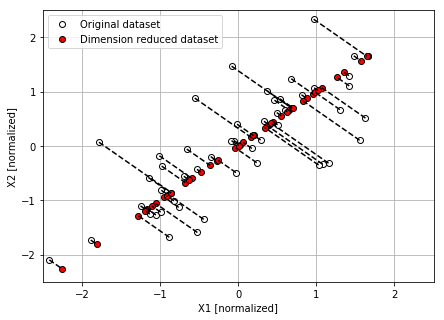

In [25]:
plt.figure(figsize=(7,5))
plt.plot(X_norm[:,0],X_norm[:,1], 'ow', mec='k', label='Original dataset')
plt.plot(X_rec[:,0],X_rec[:,1], 'or', mec='k', label='Dimension reduced dataset')
plt.xlabel('X1 [normalized]')
plt.ylabel('X2 [normalized]')
plt.plot([X_norm[:,0],X_rec[:,0]],[X_norm[:,1],X_rec[:,1]],'k--')
plt.grid(True)
plt.legend()
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))

### Face image dataset

In [26]:
faces=scipy.io.loadmat('data/ex7faces.mat')
X=faces['X']

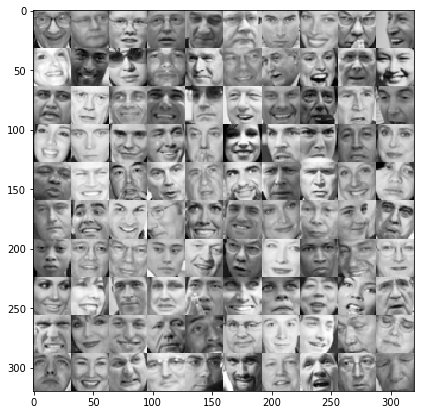

In [27]:
def display_data_set(X, nrows = 10, ncols = 10):
    
    #nrows, ncols = 10, 10
    w, h = 32, 32
    
    Xsel=X[:nrows*ncols]
    
    img = np.zeros((w*nrows,h*ncols))
    count = 0
    
    for i in range(nrows):
        for j in range(ncols):
            #print i*h,(i+1)*h,j*w,(j+1)*w
            img[i*h:(i+1)*h,j*w:(j+1)*w] = Xsel[count,:].reshape(w,h).T
            count += 1
            
    plt.imshow(img,cmap = cm.Greys_r)
 
plt.figure( figsize=(7,7))
display_data_set(X, 10, 10)

# PCA on faces

In [28]:
means, stds, X_norm = feature_normalization(X)
U,S,V = compute_pca(X_norm)

In [29]:
V.shape

(1024, 1024)

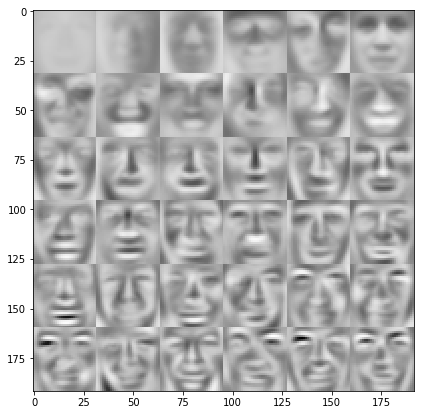

In [30]:
plt.figure( figsize=(7,7))
display_data_set(V[:36:,], 6, 6)

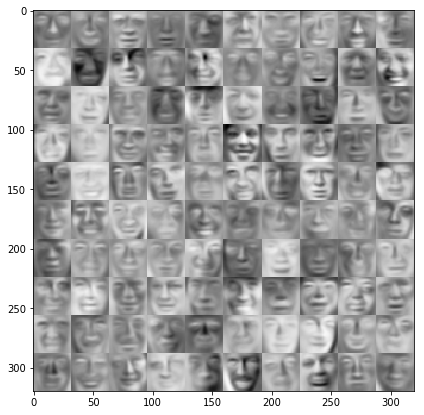

In [31]:
z = project_data(X_norm,V,36)
X_rec = recover_data(z,V,36)
plt.figure( figsize=(7,7))
display_data_set(X_rec, 10, 10)

### Optional: PCA for visualization¶

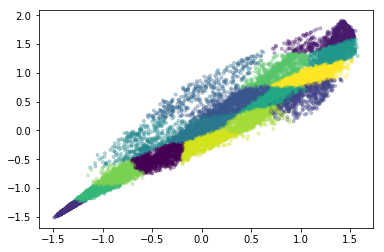

In [52]:
img=mpimg.imread('data/bird_small.png')
img_color=img.reshape(-1, img.shape[2])
means, stds, X_norm = feature_normalization(img_color)
U,S,V = compute_pca(X_norm)
z = project_data(X_norm,V,2)
X_rec = recover_data(z,V,2)
plt.scatter(X_rec[:,0],X_rec[:,1], c=idx[:], marker='.', alpha=0.3)
# Not quite sure what I have done here is correct...